# EDA
Author: Scott Lee
Student ID: 27680975

Below is my EDA code. This was done on my local machine as opposed to the model which was done in the colabs environment. 
EDA was easier to do on the local machine in the Jupyter Notebook Environment.
## Purpose
The purpose of the EDA was to better understand the data distriburtions and characteristics to see if this could be leveraged to improve the final model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#to import cv2 on your local machine, first run pip install opencv-python
import cv2

In [2]:
train_df = pd.read_csv("train_set_with_image_student.csv")
train_df.drop(['image'], axis=1, inplace=True)
train_df.rename({"label":"Label", "label_confidence":"Label_Confidence"}, axis = 1, inplace = True)
train_df.head()

,ID,Label,Label_Confidence
0,818021711,Positive,0.6715
1,911806503,Positive,0.6642
2,882035319,Negative,0.6683
3,880892525,Neutral,0.3360
4,828003448,Positive,1.0000


## EDA

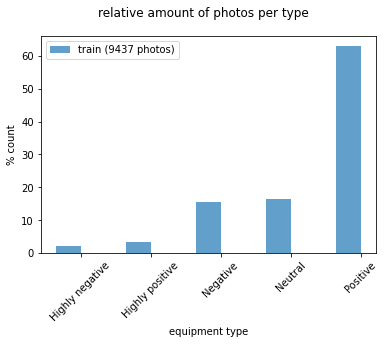

In [3]:
# let's see the label distribution
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(train_df['Label'], loc='left')
plt.legend([
    'train ({0} photos)'.format(len(train_df['Label']))
]);

In [4]:
#Import visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

/Users/scott/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

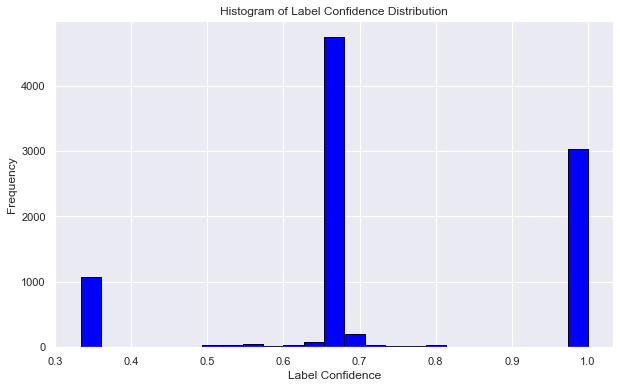

In [13]:
#Lets see the 'label confidence distribution'
sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=25 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

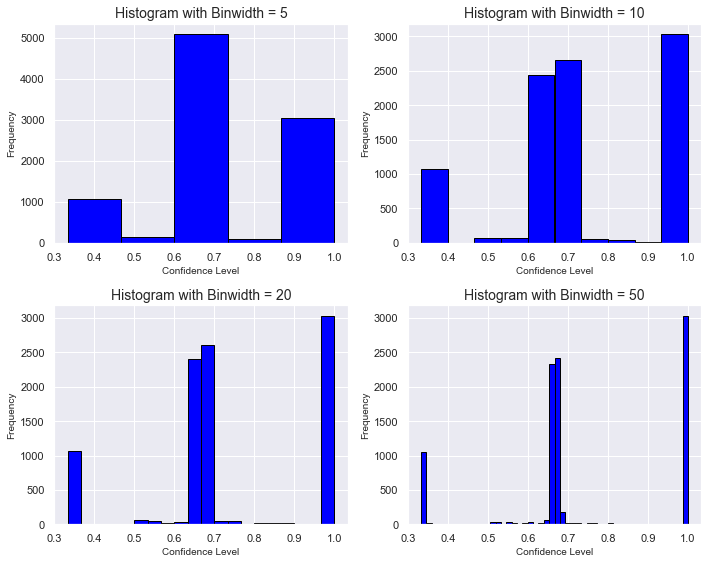

In [14]:
#Using a seroes of histograms to see if different bin sizes help me to understand the distributions.
sns.set(rc = {'figure.figsize':(10,8)})

#Show 4different binwidths
for i, binwidth in enumerate([5,10,20,50]):
    
    #Set up plot
    ax = plt.subplot(2,2, i + 1)
    
    
    #Draw the plot
    ax.hist(train_df['Label_Confidence'], bins = int(binwidth),
            color = 'blue', edgecolor='black')
    
    
    #Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size=14)
    ax.set_xlabel('Confidence Level', size = 10)
    ax.set_ylabel('Frequency', size = 10)

plt.tight_layout()
plt.show()

Looking at the above histogram, I can see the central tendancy groupings. 


### Individual Classification Breakdowns

The below code shows Label Confidence Distribution across the Positive Classification

Text(0, 0.5, 'Frequency')

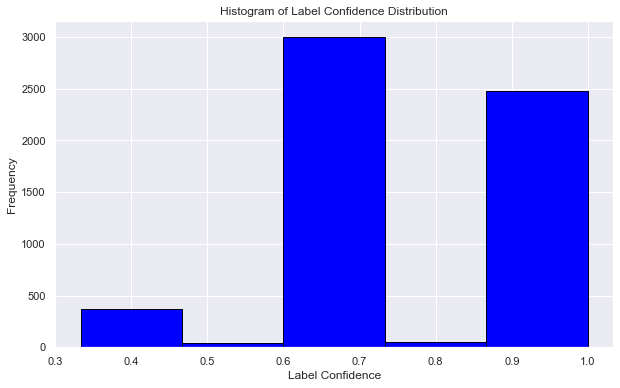

In [17]:
#Positive label confidence distribution
pos_label = train_df['Label']=="Positive"
train_df_pos = train_df[pos_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

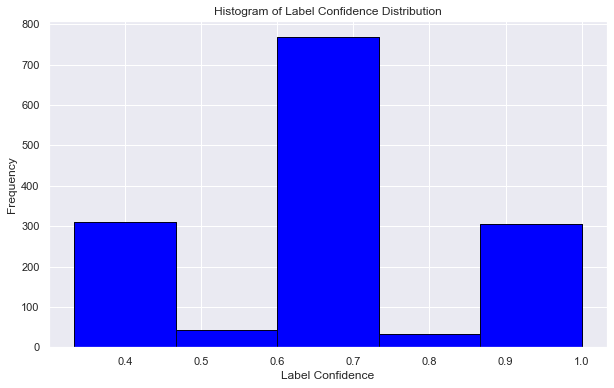

In [20]:
#'Negative' negative confidence distribution
neg_label = train_df['Label']=="Negative"
train_df_neg = train_df[neg_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_neg['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_neg['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

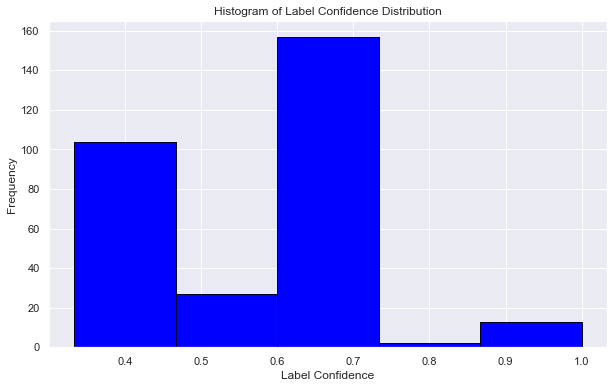

In [21]:
#'Highly positive' label confidence distribution
high_pos_label = train_df['Label']=="Highly positive"
train_df_hig_pos = train_df[high_pos_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_hig_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_hig_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

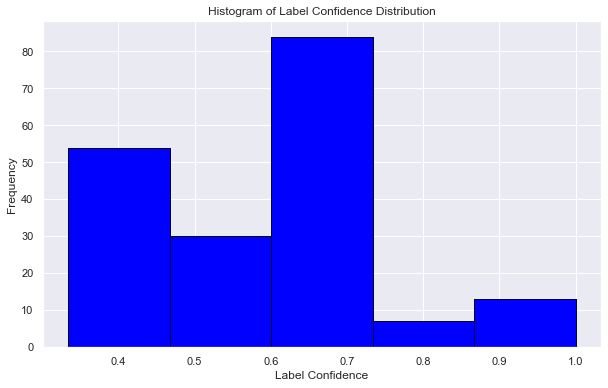

In [23]:
#'Highly negative' label confidence distribution
high_neg_label = train_df['Label']=="Highly negative"
train_df_hig_neg = train_df[high_neg_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_hig_neg['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_hig_neg['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

## Comments
<br>
The Label Confidence variables tended to group into 3 main areas of confidence. I would call 0.9-1 as highly confident, 0.6-0.75 moderately confident, and 0.4 low confidence. 

The 'Positive classification is the most numerious, and also holds the tendancy of the overal ldata set of most of the 'Positive' confidence labels sitting at moderate and high confidence. 

However as we go through the other classifications this is not alwayst the case. 'Highly positive' and 'Highly negative' have far more low confidence labels thenan high.

'Negative' and 'Neutral' label are roughly even in this, with still strong moderate confidence.

My hypothesis is that if I exclude these low confidence observations, they will improve model accuracy. And this will be more pronunced in the 'Highly positive' and 'Highly negative categories as the current set up is likley skewing the results. 

## Cut-Off DataFrame

Below is the simple code to create a cut off criteria based off of a minimum label 

In [12]:
conf_level = train_df['Label_Confidence'] > 0.65
train_df_65_conf = train_df[conf_level]
train_df_65_conf

,ID,Label,Label_Confidence
0,818021711,Positive,0.6715
1,911806503,Positive,0.6642
2,882035319,Negative,0.6683
4,828003448,Positive,1.0000
5,146000529,Positive,0.6716
...,...,...,...
9431,480549023,Positive,1.0000
9432,316247246,Positive,0.6667
9433,455970656,Positive,0.6716
9434,380127764,Positive,0.6677


Text(0, 0.5, 'Frequency')

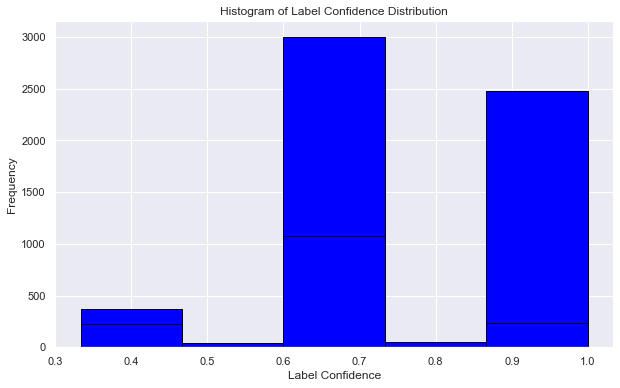

In [18]:
#Neutral label confidence distribution
pos_label = train_df['Label']=="Positive"
train_df_pos = train_df[pos_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')
label = train_df['Label']=="Neutral"
train_df_neu = train_df[label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_neu['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_neu['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

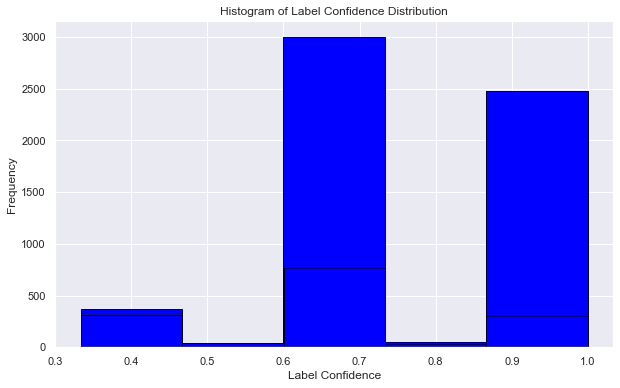

In [16]:
#Negative label confidence distribution
pos_label = train_df['Label']=="Positive"
train_df_pos = train_df[pos_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')
label = train_df['Label']=="Negative"
train_df_neg = train_df[label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_neg['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_neg['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

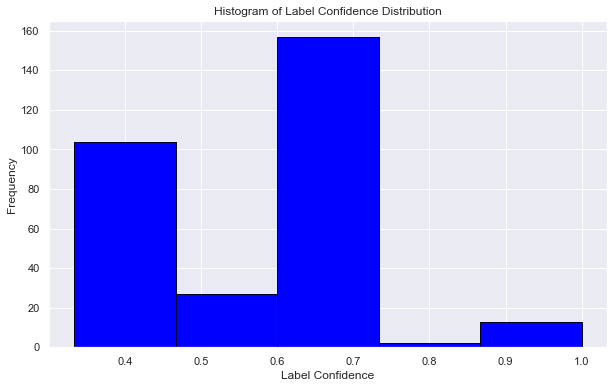

In [10]:
label = train_df['Label']=="Highly positive"
train_df_hig_pos = train_df[label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_hig_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_hig_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

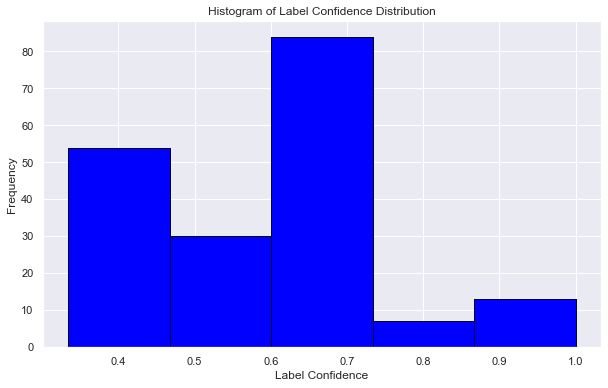

In [11]:
#Highly Negative label confidence distribution
pos_label = train_df['Label']=="Positive"
train_df_pos = train_df[pos_label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_pos['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_pos['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')
label = train_df['Label']=="Highly negative"
train_df_hig_neg = train_df[label]


sns.set(rc = {'figure.figsize':(10,6)})
#Defining bin width for histograms
bin_width=5 # Change for optimisation
#Matplotlib Histogram
plt.hist(train_df_hig_neg['Label_Confidence'], color = 'blue', 
        edgecolor='black', bins = bin_width)

#Seaborn Histogram
sns.distplot(train_df_hig_neg['Label_Confidence'], hist=True, kde=False,
           bins = bin_width, color='blue',
          hist_kws={'edgecolor':'black'})

#Adding labels
plt.title("Histogram of Label Confidence Distribution")
plt.xlabel('Label Confidence')
plt.ylabel('Frequency')

## Cutt off DF
<br>
Make a dataframe that cuts rows below a certain_confidence level